Abalone Case Study
Problem Statement: The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict.

Name / Data Type / Measurement Unit / Description
Sex / nominal / -- / M, F, and I (infant) Length / continuous / mm / Longest shell measurement Diameter / continuous / mm / perpendicular to length Height / continuous / mm / with meat in shell Whole weight / continuous / grams / whole abalone Shucked weight / continuous / grams / weight of meat Viscera weight / continuous / grams / gut weight (after bleeding) Shell weight / continuous / grams / after being dried Rings / integer / -- / +1.5 gives the age in years.

You have to predict the rings of each abalone which will lead us to the age of that abalone.

In [1]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


we have 4177 rows and 9 columns

In [4]:
df.shape

(4177, 9)

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

# using Label encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])

df['Sex'].value_counts   # 0 for female, 1 for Infants, 2 for Male

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32>

# checking null values

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

there are no values in the dataset

# checking statistical values

In [9]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# checking class imbalace by plotting

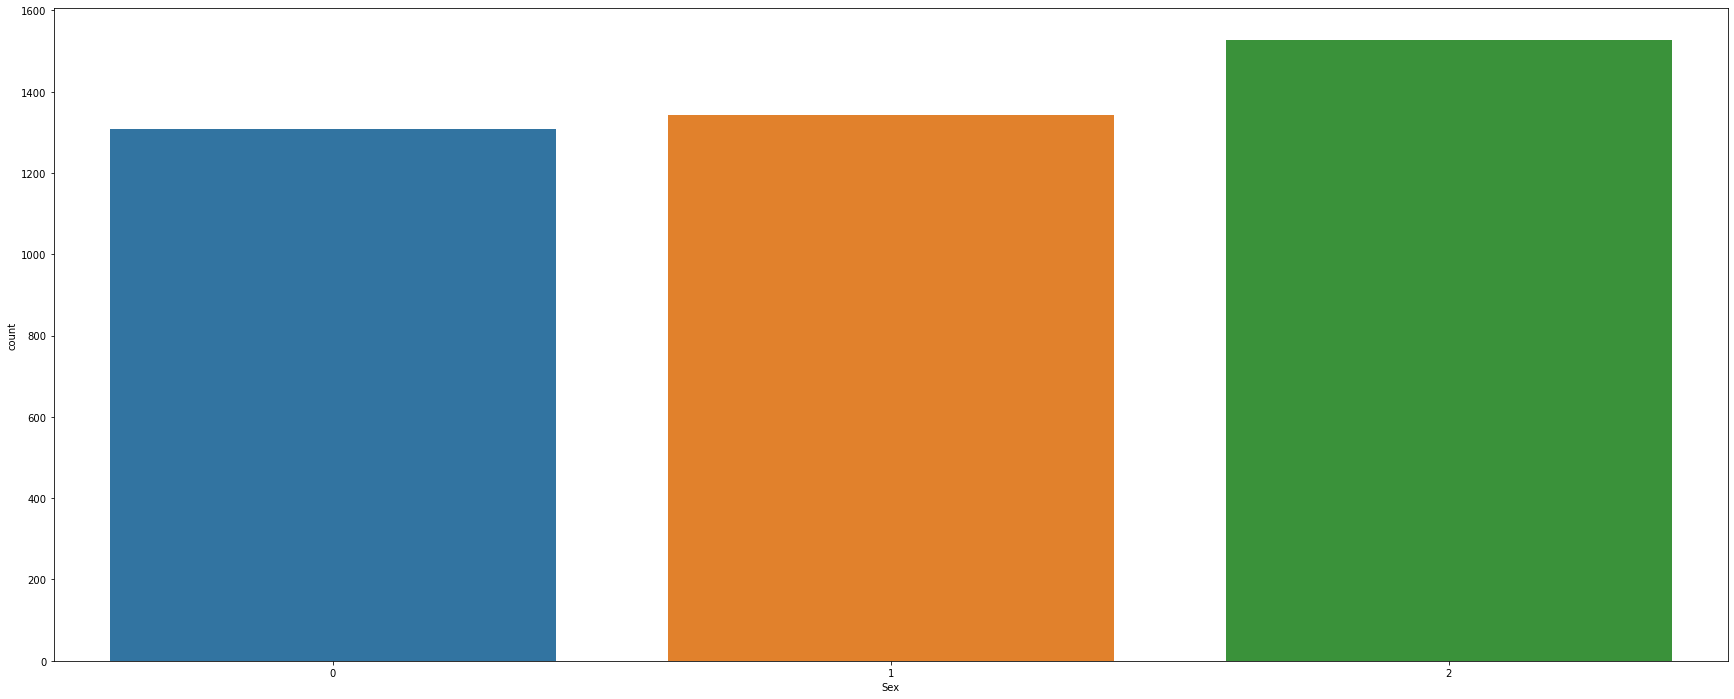

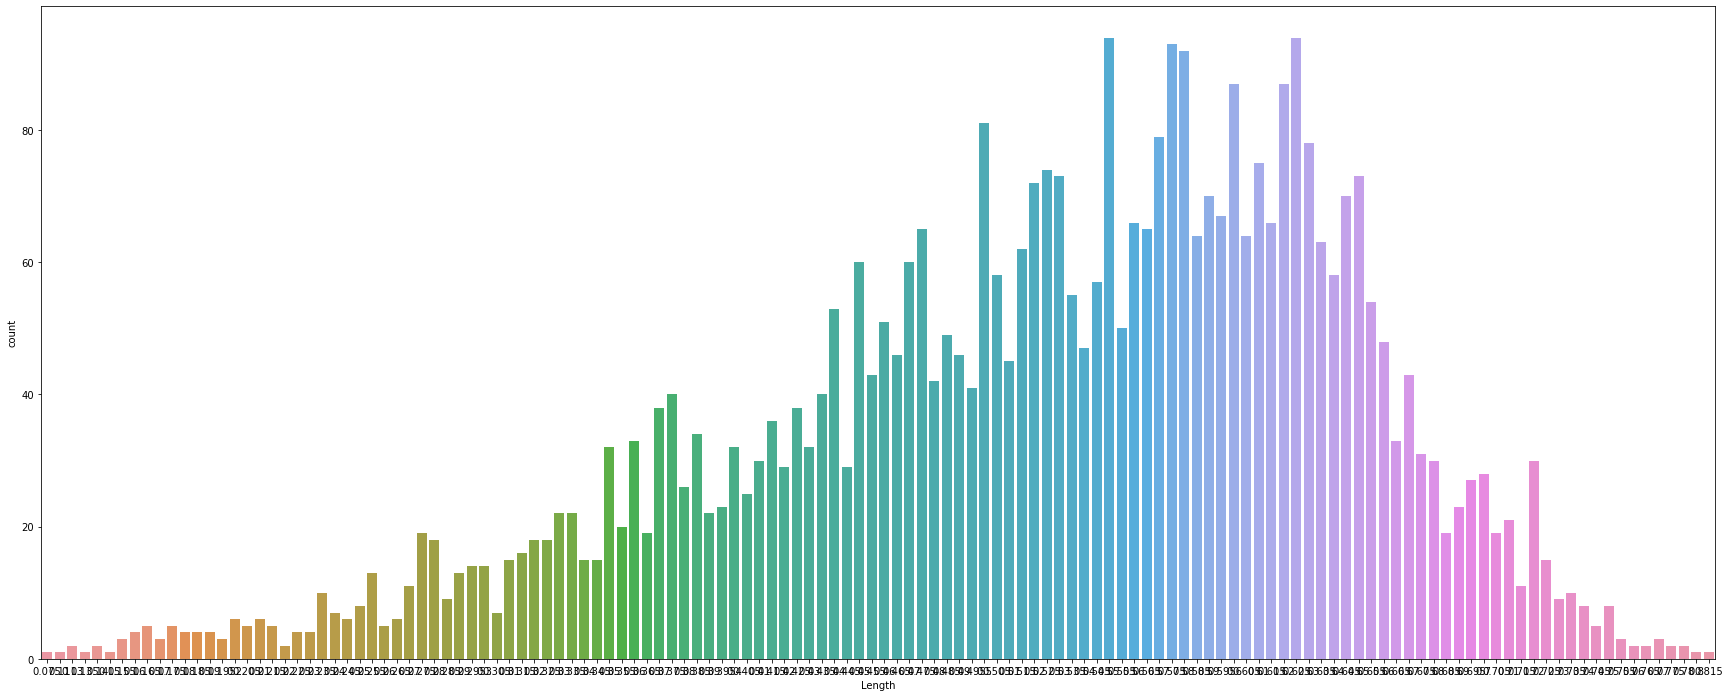

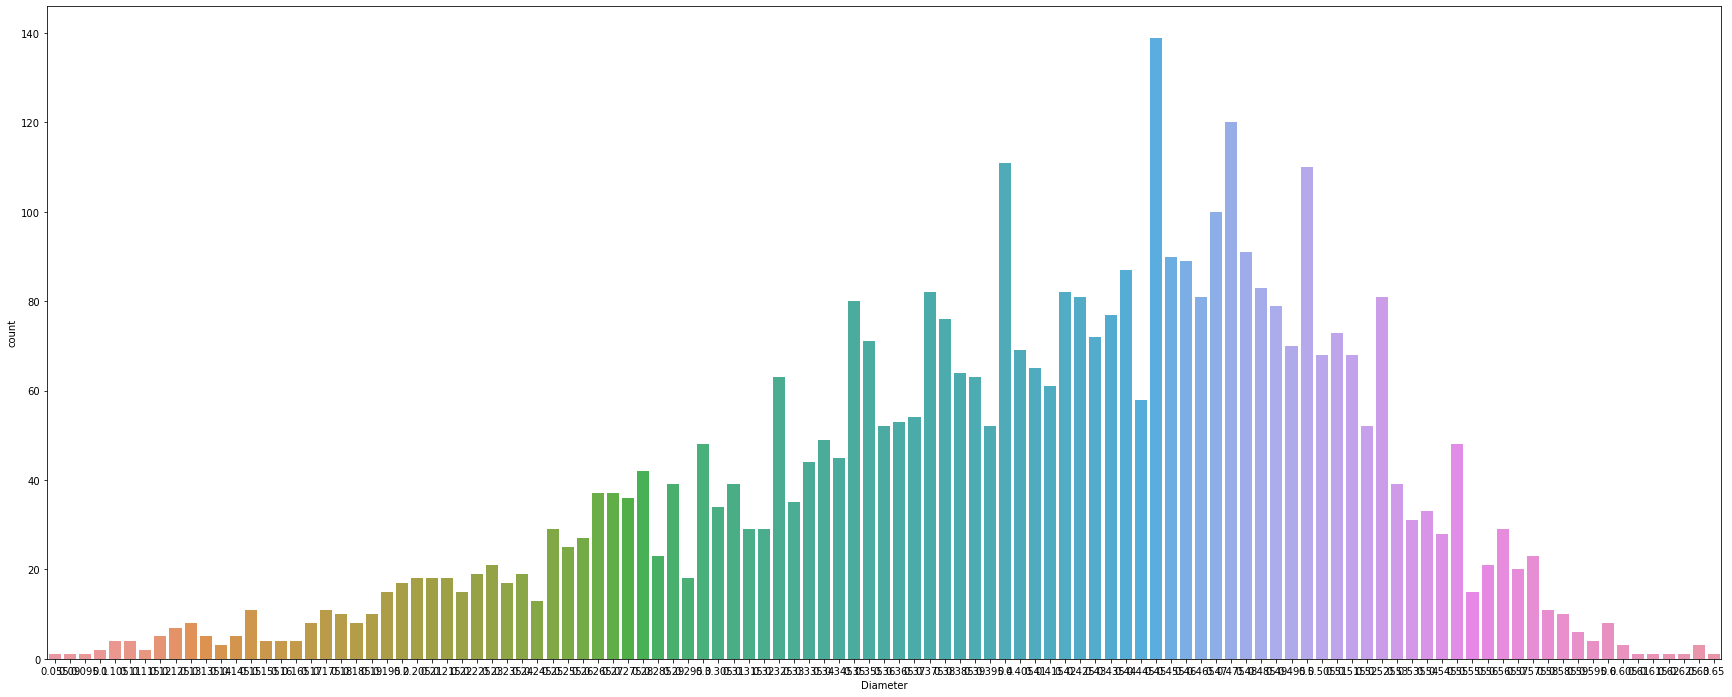

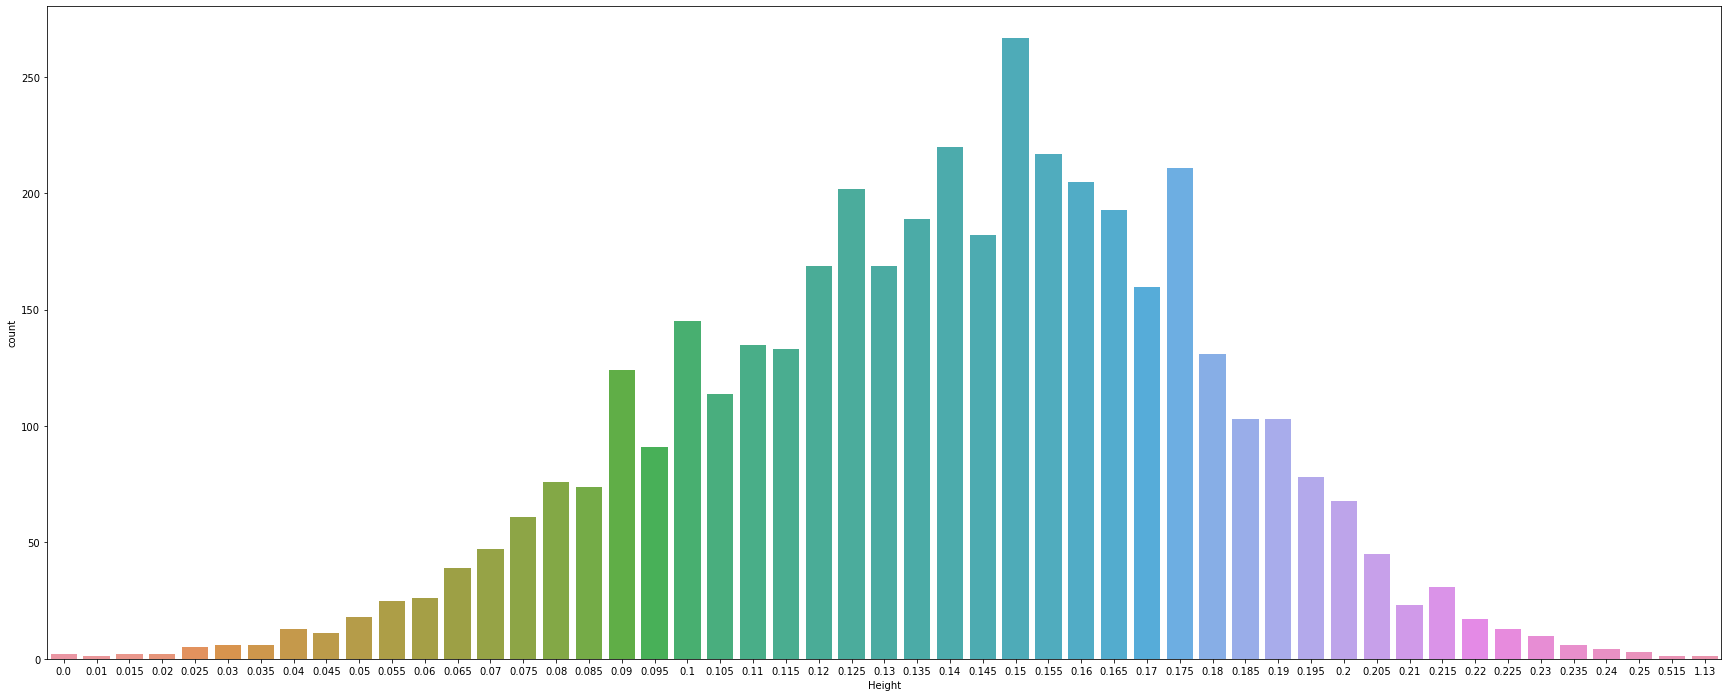

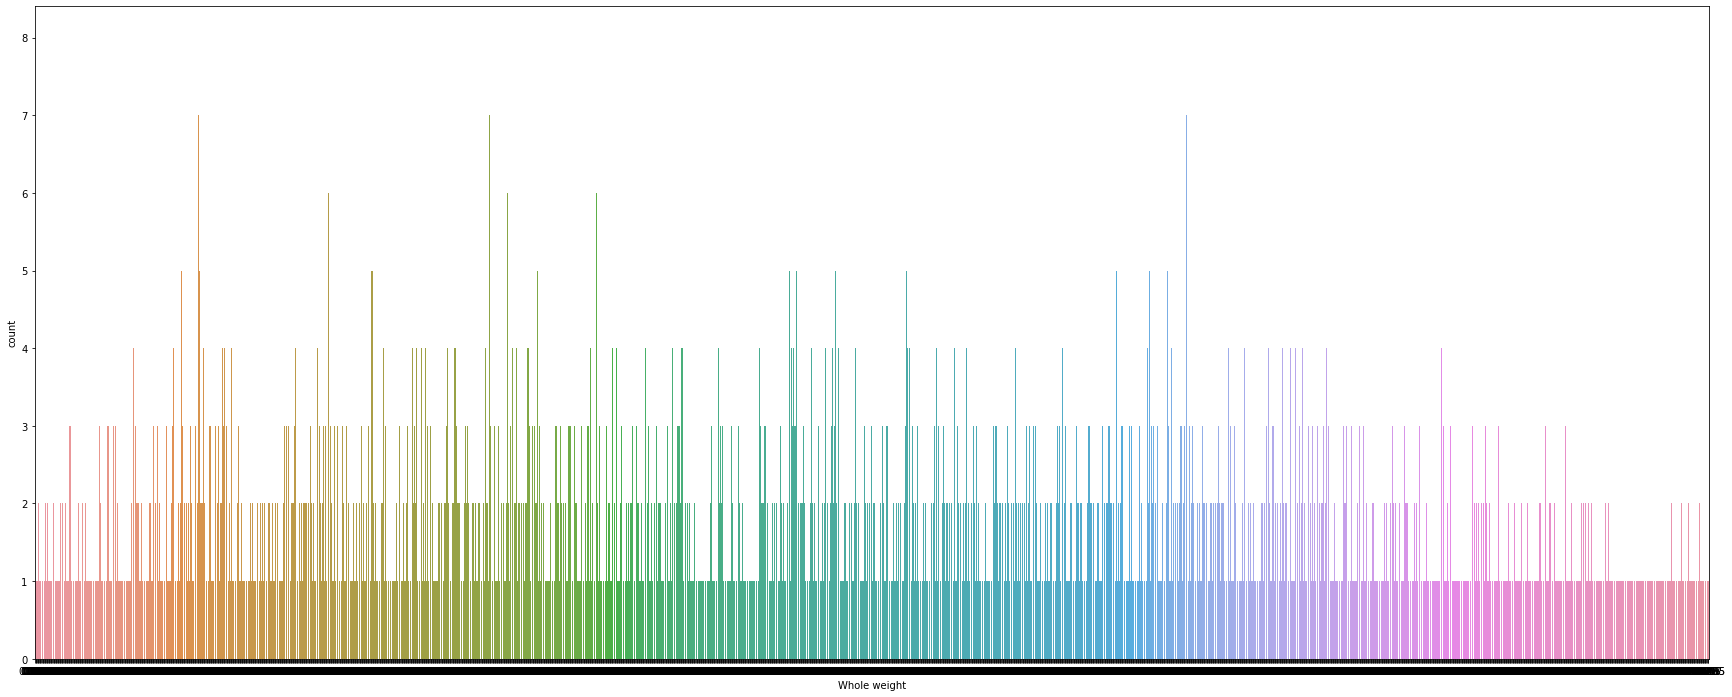

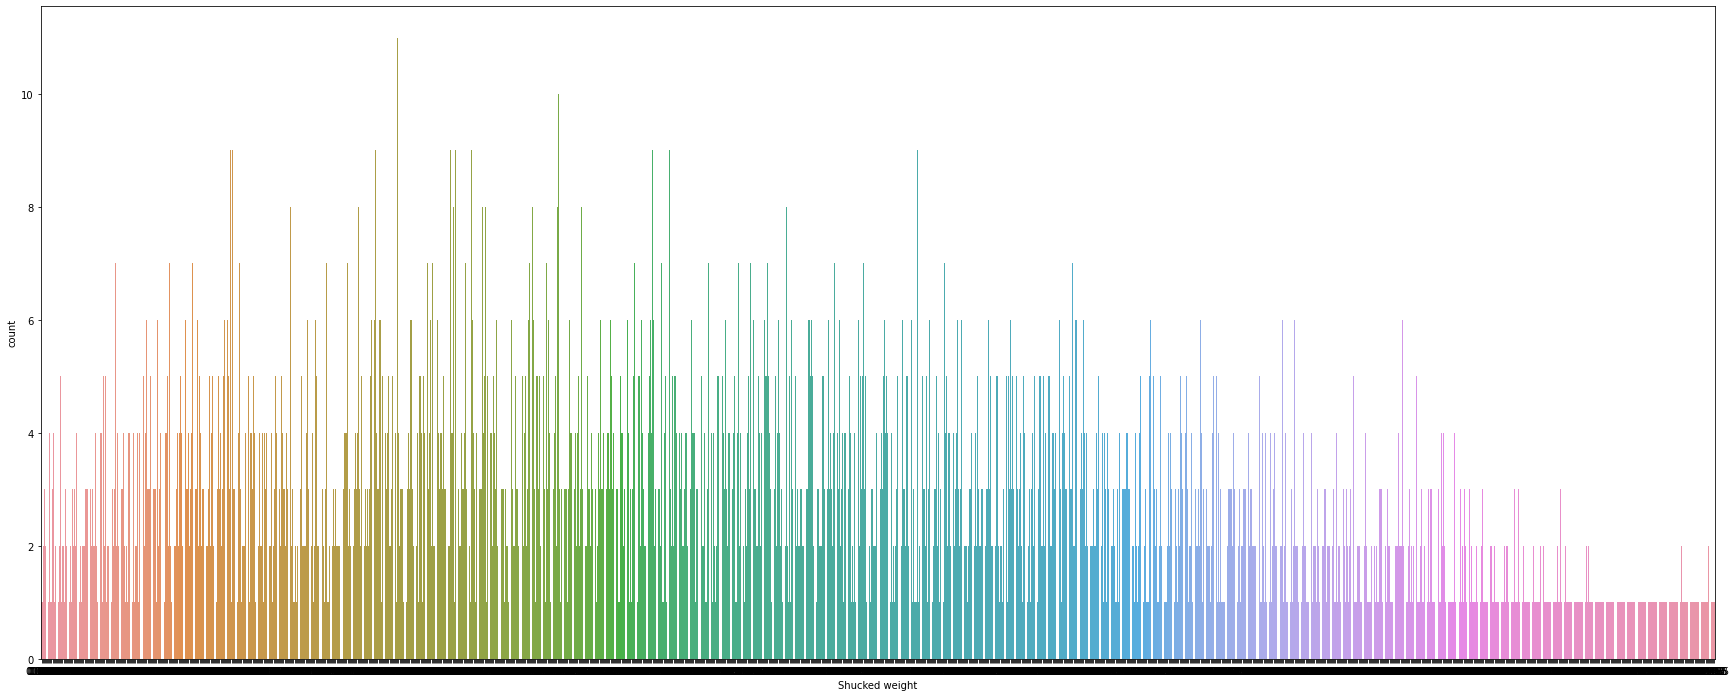

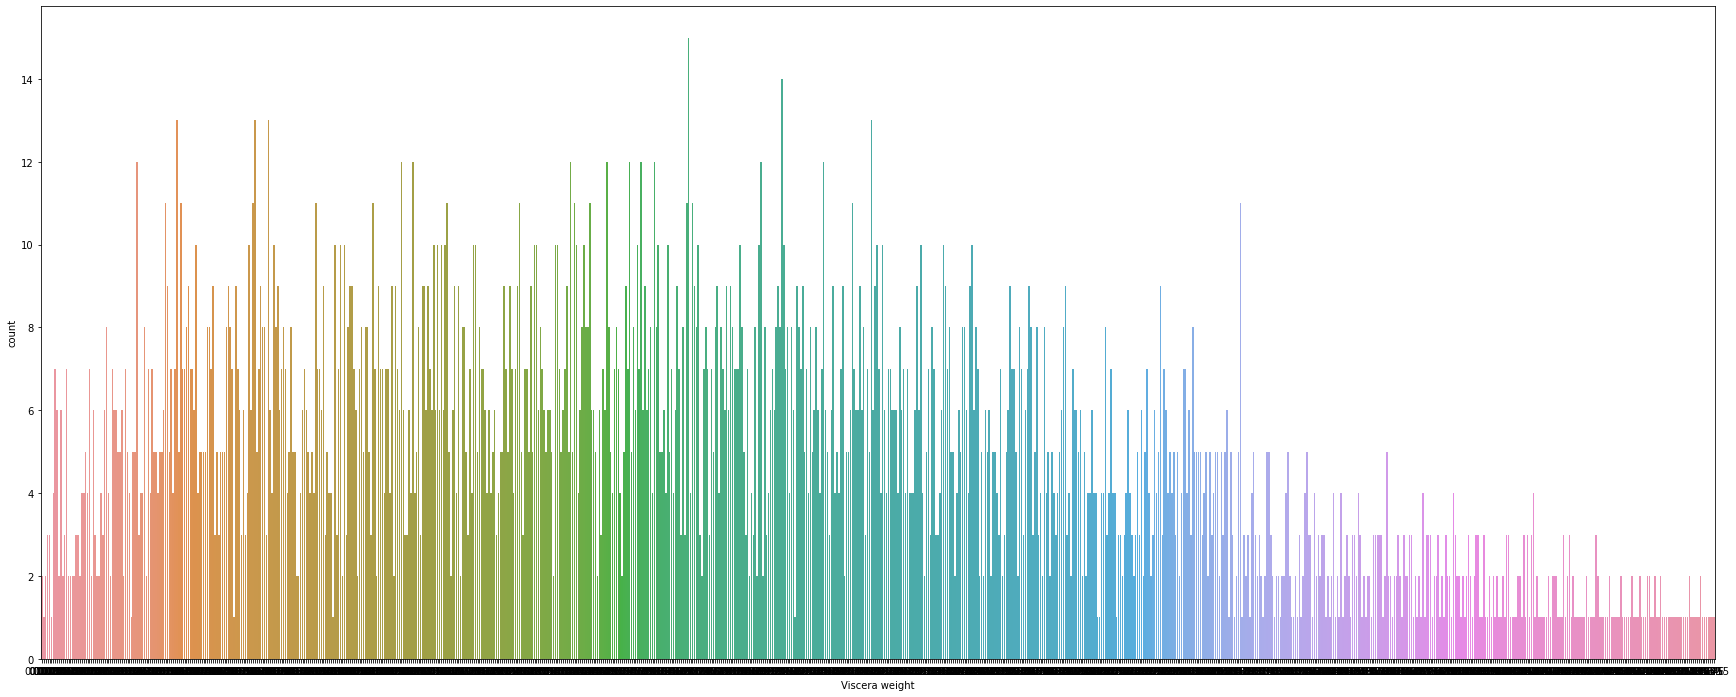

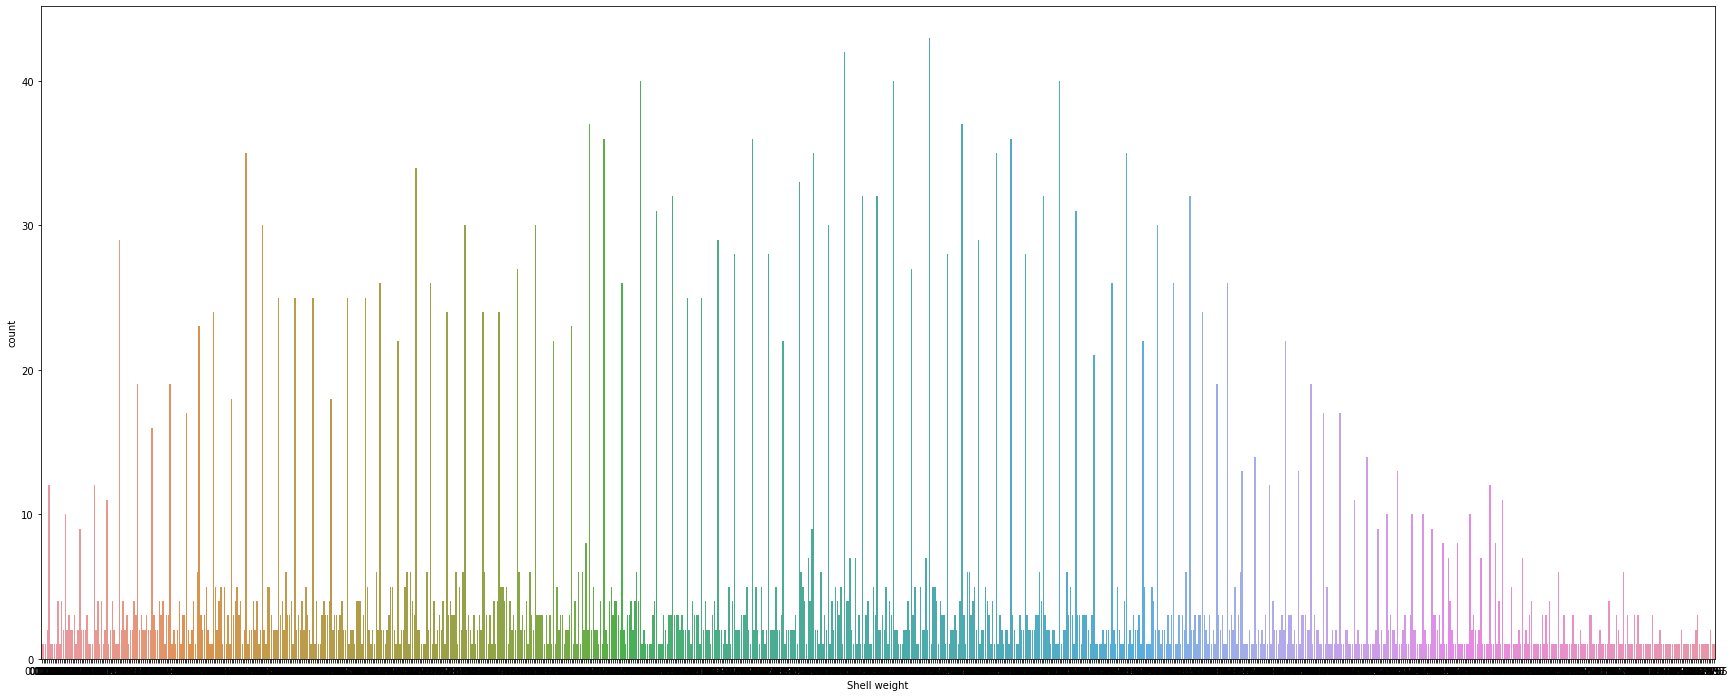

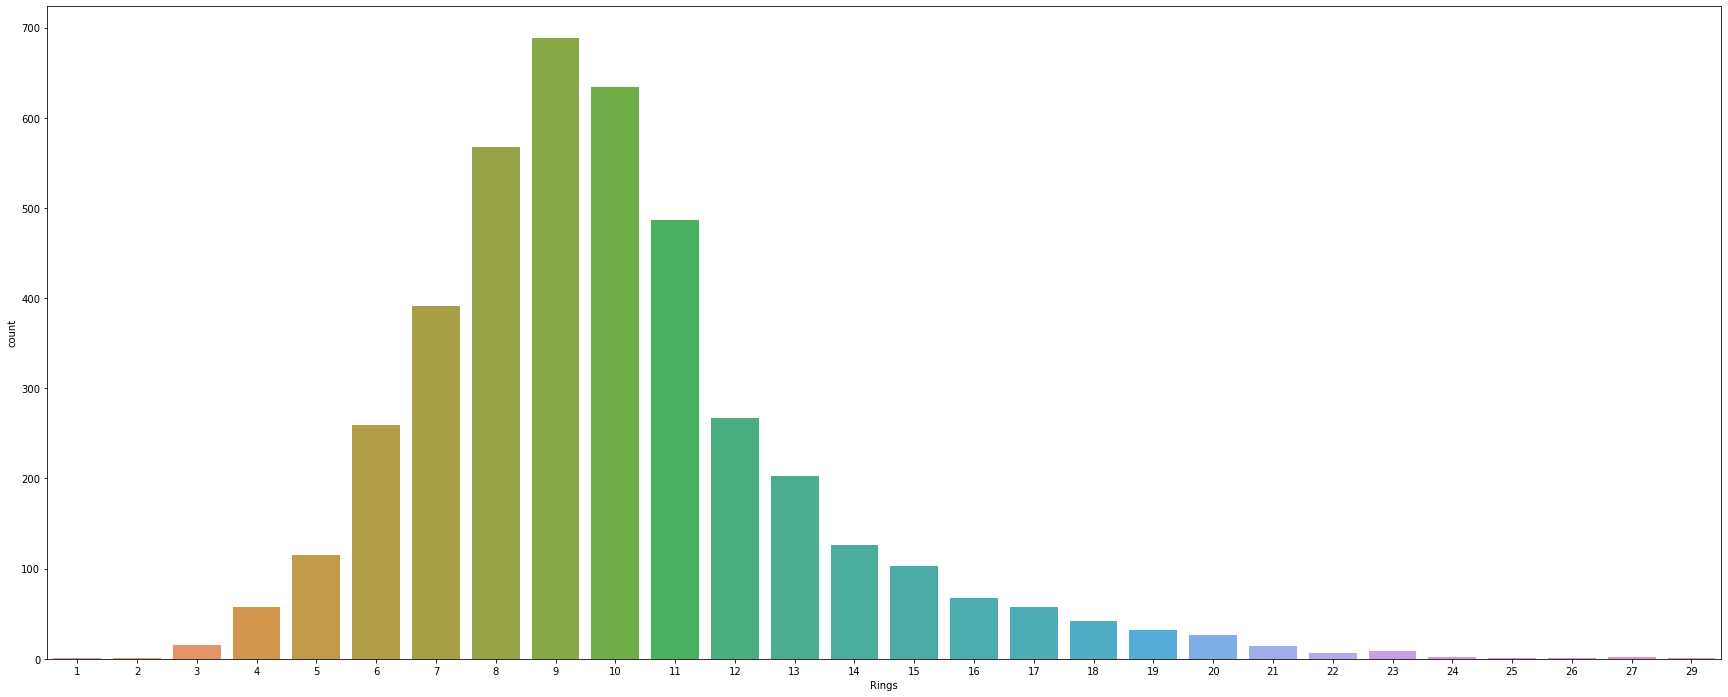

In [10]:
list=['Sex','Length',            
'Diameter',          
'Height',            
'Whole weight',      
'Shucked weight',    
'Viscera weight',    
'Shell weight',      
'Rings']

for i in list:
    plt.subplots(figsize=(30,12))
    sns.countplot(i,data=df)
    plt.show()

class are in balance

# checking for outliers

Sex                  AxesSubplot(0.125,0.837584;0.227941x0.0424157)
Length            AxesSubplot(0.398529,0.837584;0.227941x0.0424157)
Diameter          AxesSubplot(0.672059,0.837584;0.227941x0.0424157)
Height               AxesSubplot(0.125,0.786685;0.227941x0.0424157)
Whole weight      AxesSubplot(0.398529,0.786685;0.227941x0.0424157)
Shucked weight    AxesSubplot(0.672059,0.786685;0.227941x0.0424157)
Viscera weight       AxesSubplot(0.125,0.735787;0.227941x0.0424157)
Shell weight      AxesSubplot(0.398529,0.735787;0.227941x0.0424157)
Rings             AxesSubplot(0.672059,0.735787;0.227941x0.0424157)
dtype: object

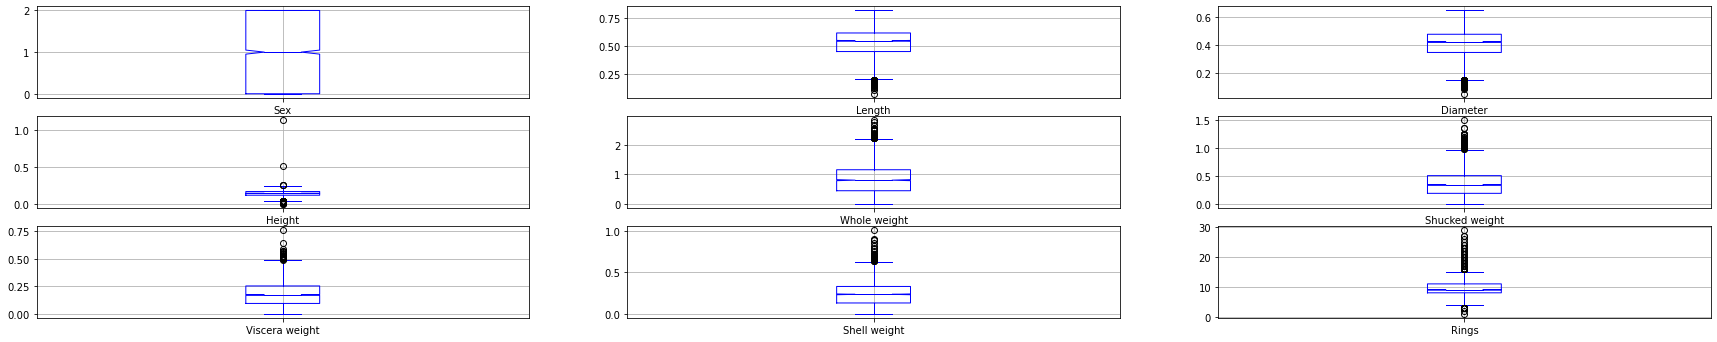

In [11]:
df.plot(kind='box',subplots=True,layout=(15,3),figsize=(30,30),grid=True,notch=True,color='blue',legend=True)

there are outliers in the dataset

# checking disturbuition

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

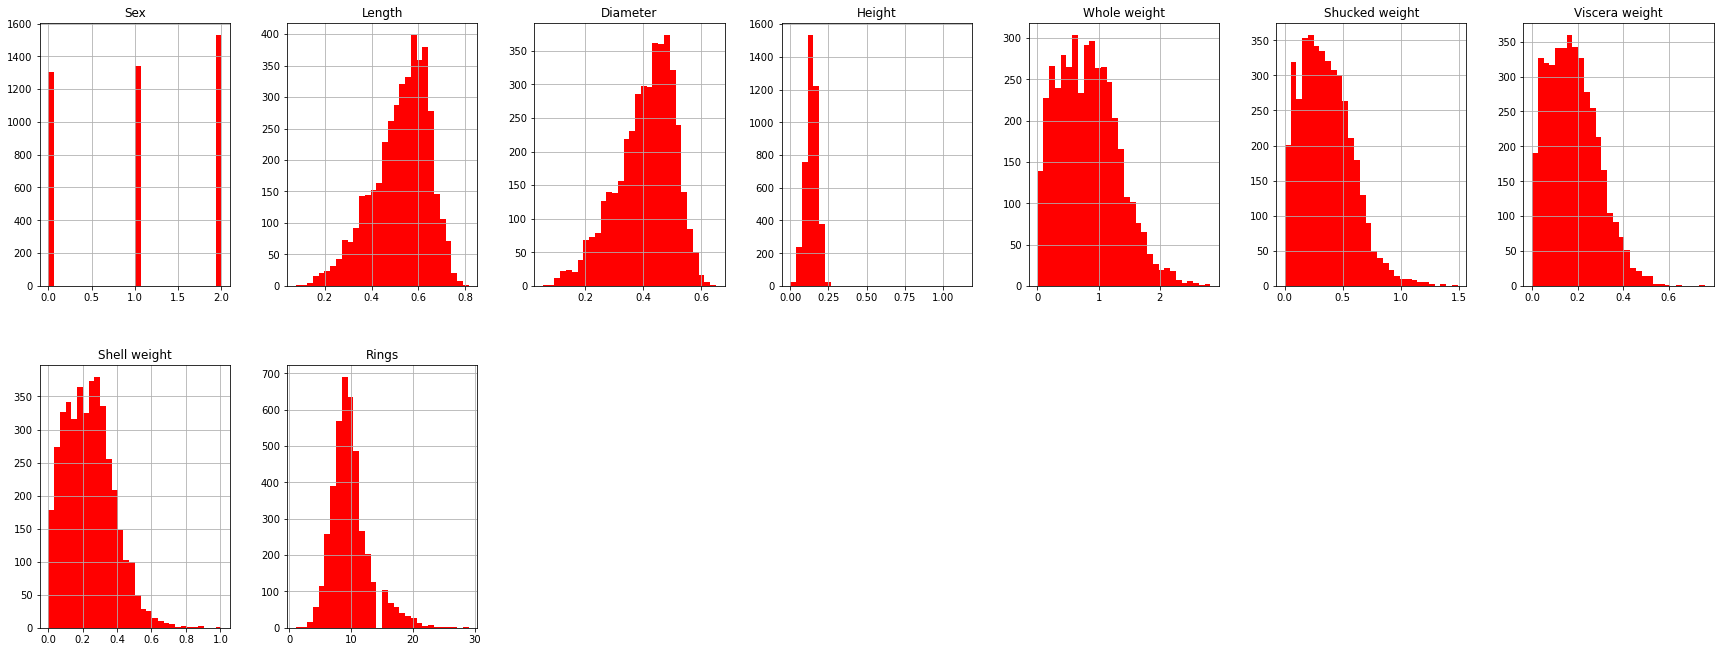

In [12]:
df.hist(figsize=(30,30),grid=True,layout=(5,7),bins=30,color='red')

some are left skewed

# checking correlation

In [13]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# checking skewness

In [14]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# relation between sex and rings

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

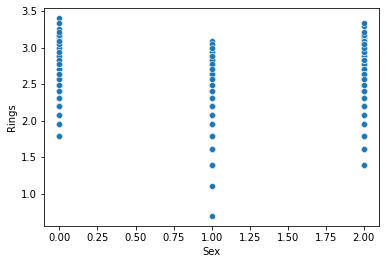

In [17]:
sns.scatterplot(x="Sex",y="Rings",data=df)

# relation between length and rings

<AxesSubplot:xlabel='Length', ylabel='Rings'>

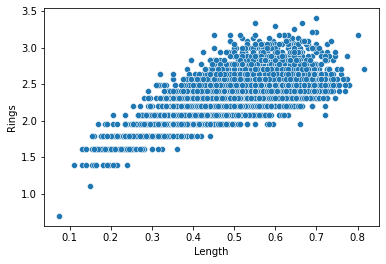

In [18]:
sns.scatterplot(x="Length",y="Rings",data=df)

# relation between diameter and rings

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

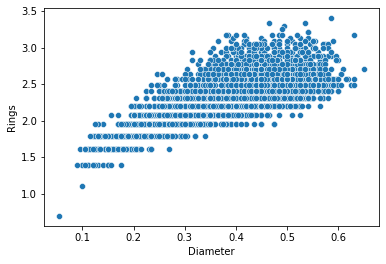

In [19]:
sns.scatterplot(x="Diameter",y="Rings",data=df)

# relation between height and rings

<AxesSubplot:xlabel='Height', ylabel='Rings'>

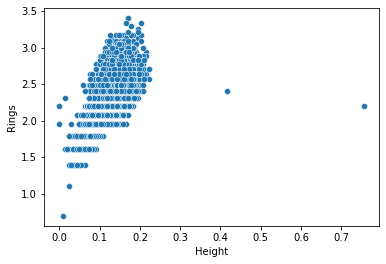

In [20]:
sns.scatterplot(x="Height",y="Rings",data=df)

# relation between shucked weight and rings

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

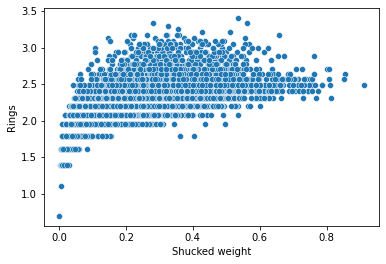

In [21]:
sns.scatterplot(x="Shucked weight",y="Rings",data=df)

# relation between whole weight and rings

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

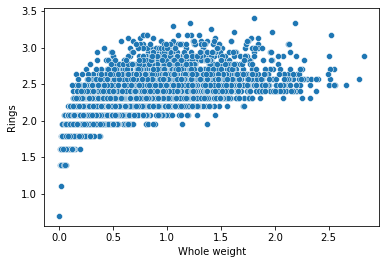

In [22]:
sns.scatterplot(x="Whole weight",y="Rings",data=df)

# relation between viscera weight and and rings

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

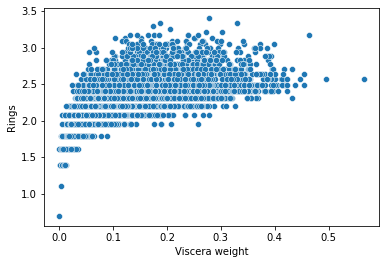

In [23]:
sns.scatterplot(x="Viscera weight",y="Rings",data=df)

# relation between shell weight and rings

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

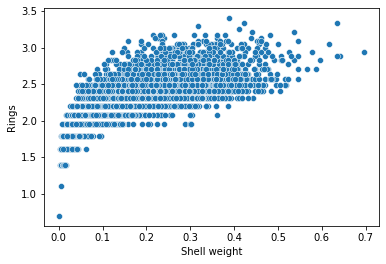

In [24]:
sns.scatterplot(x="Shell weight",y="Rings",data=df)


# spliting variables into x and y

In [27]:
x=df.drop("Rings",axis=1)
y=df["Rings"]

In [28]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()
x=Sc.fit_transform(x)
x

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.57746793,
        -0.71947173, -0.61961747],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.25564401,
        -1.25536077, -1.27404853],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.41498918,
        -0.32325169, -0.15801127],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.80682006,
         0.99687563,  0.54884084],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.82948674,
         0.76876605,  0.46518773],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.33853197,
         1.73001085,  1.76167903]])

# model training-finding random state

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
maxScore=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    sc=lm.score(x_train,y_train)
    if sc>maxScore:
        maxScore=sc
        maxRs=i
print("Best Accuracy is ", maxScore,"on Random_State",maxRs)

Best Accuracy is  0.6030954265702773 on Random_State 165


In [31]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=165)

In [32]:
x_train.shape

(3341, 8)

In [33]:
y_train.shape

(3341,)

In [34]:
x_test.shape

(836, 8)

In [35]:
y_test.shape

(836,)

In [36]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [37]:
lm.coef_

array([ 0.00628126,  0.06553615,  0.13695653,  0.09575704,  0.14910855,
       -0.32616733, -0.05282178,  0.12618271])

In [38]:
lm.intercept_

2.3493543743919285

In [39]:
lm.score(x_train,y_train)

0.6030954265702773

In [40]:
#predict the value
pred=lm.predict(x_test)
print("Predicted Rings:",pred)
print("Actual Rings",y_test)

Predicted Rings: [2.32630747 2.54458132 2.13435934 2.05121458 2.29654906 2.13870494
 2.40923173 1.95664951 2.24946246 2.43089972 2.54207972 2.46611873
 2.24440492 2.23941933 2.04084805 2.21753226 2.42723068 2.54789356
 2.42681219 2.44315738 2.12547694 2.45853103 2.32693996 1.98748118
 2.53748114 2.63773644 2.45944867 2.30421765 2.36801495 2.15297675
 2.76859357 2.33312716 2.4459393  1.92632142 2.81039741 2.32538474
 2.25250507 2.50507526 2.72029416 2.33274327 2.28229545 2.52647997
 2.1126146  2.14686909 2.05654908 2.39183735 2.56328701 2.276445
 2.21916968 2.33406819 2.33361401 2.35331035 2.40921226 2.38300091
 2.25517315 2.53671625 2.31900355 2.24420571 2.22489589 2.47383089
 2.31281306 2.11632942 2.54431709 2.24160771 2.29613342 2.49392196
 2.24195796 2.39634642 2.60100304 2.44020088 2.4962449  1.93349768
 2.17812073 2.90451336 2.60622904 2.45050113 2.71404325 2.69173795
 2.70461961 2.13248247 2.47506497 2.25169219 1.89804215 2.30811227
 2.11246708 2.42572777 2.10917217 2.20955425 2.

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('error:')

print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

print('Mean Squared error: ',mean_squared_error(y_test,pred))

print('Root Mean Squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute error:  0.15009563113331273
Mean Squared error:  0.039822651867595406
Root Mean Squared error:  0.1995561371333776


In [42]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5033268486954038


In [43]:
import joblib
joblib.dump(lm,"AbalonecaseStudy.obj")

['AbalonecaseStudy.obj']